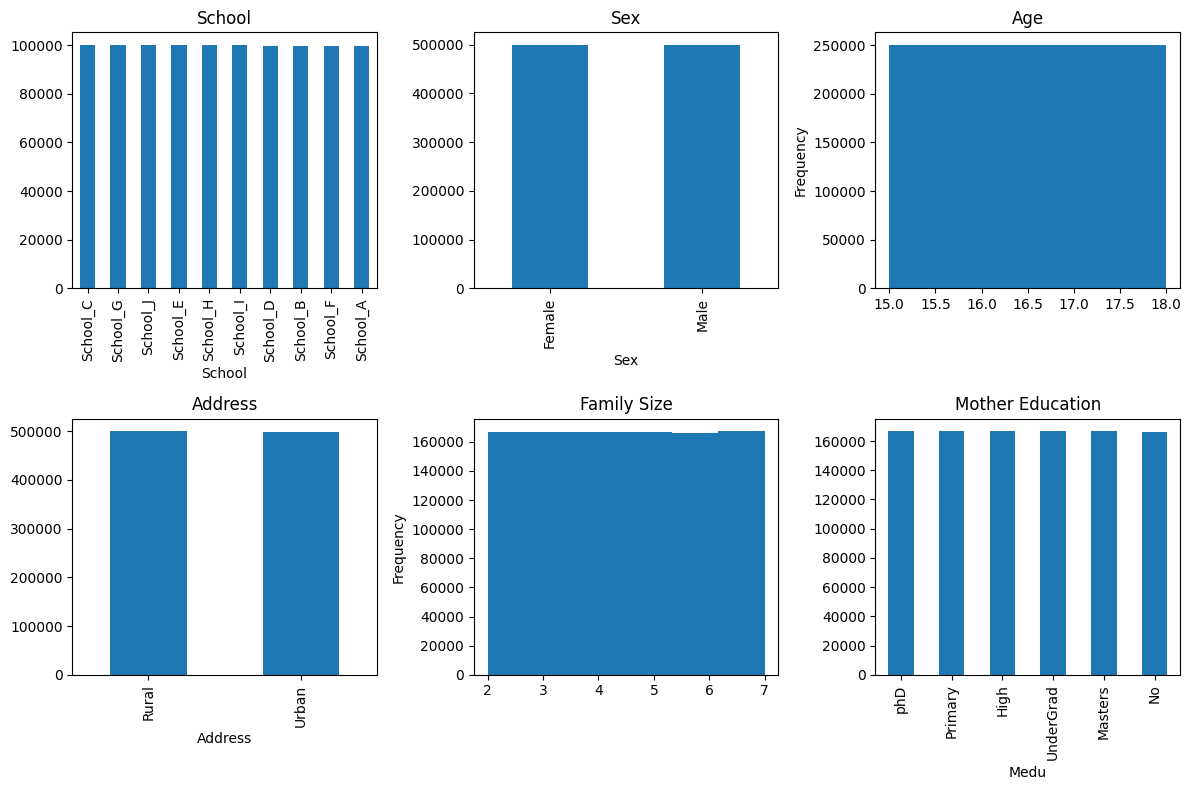

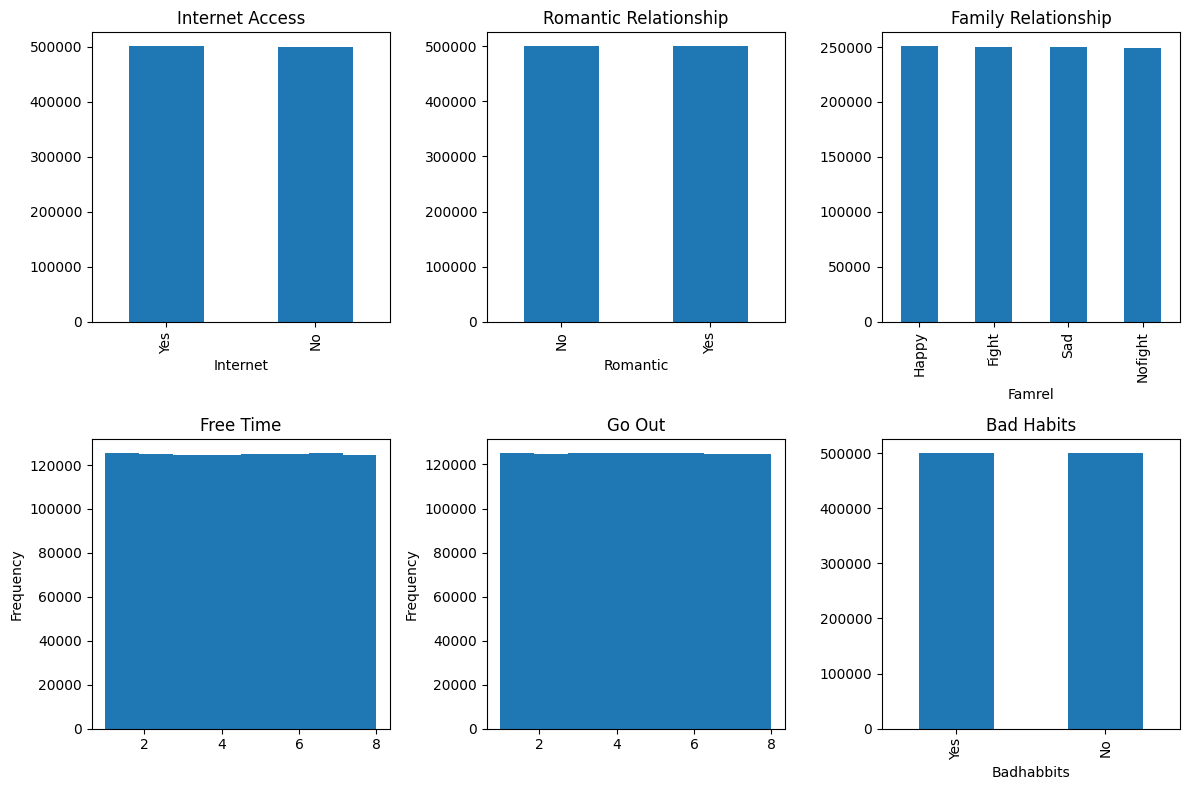

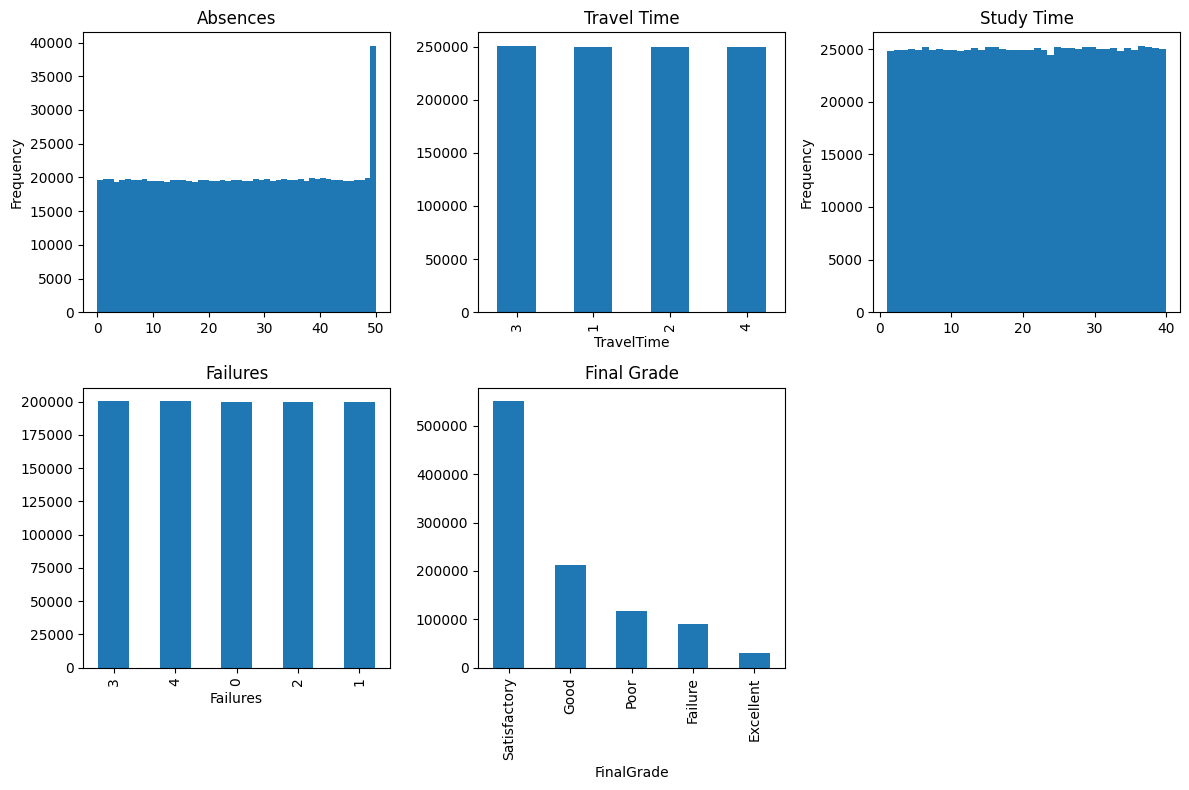

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_dataset.csv')

# Visualization of demographic features
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['School'].value_counts().plot(kind='bar')
plt.title('School')

plt.subplot(2, 3, 2)
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex')

plt.subplot(2, 3, 3)
df['Age'].plot(kind='hist', bins=4)
plt.title('Age')

plt.subplot(2, 3, 4)
df['Address'].value_counts().plot(kind='bar')
plt.title('Address')

plt.subplot(2, 3, 5)
df['FamSize'].plot(kind='hist', bins=6)
plt.title('Family Size')

plt.subplot(2, 3, 6)
df['Medu'].value_counts().plot(kind='bar')
plt.title('Mother Education')

plt.tight_layout()
plt.show()

# Visualization of social features
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['Internet'].value_counts().plot(kind='bar')
plt.title('Internet Access')

plt.subplot(2, 3, 2)
df['Romantic'].value_counts().plot(kind='bar')
plt.title('Romantic Relationship')

plt.subplot(2, 3, 3)
df['Famrel'].value_counts().plot(kind='bar')
plt.title('Family Relationship')

plt.subplot(2, 3, 4)
df['FreeTime'].plot(kind='hist', bins=8)
plt.title('Free Time')

plt.subplot(2, 3, 5)
df['Goout'].plot(kind='hist', bins=8)
plt.title('Go Out')

plt.subplot(2, 3, 6)
df['Badhabbits'].value_counts().plot(kind='bar')
plt.title('Bad Habits')

plt.tight_layout()
plt.show()

# Visualization of academic-related features
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['Absences'].plot(kind='hist', bins=50)
plt.title('Absences')

plt.subplot(2, 3, 2)
df['TravelTime'].value_counts().plot(kind='bar')
plt.title('Travel Time')

plt.subplot(2, 3, 3)
df['StudyTime'].plot(kind='hist', bins=40)
plt.title('Study Time')

plt.subplot(2, 3, 4)
df['Failures'].value_counts().plot(kind='bar')
plt.title('Failures')

plt.subplot(2, 3, 5)
df['FinalGrade'].value_counts().plot(kind='bar')
plt.title('Final Grade')

plt.tight_layout()
plt.show()


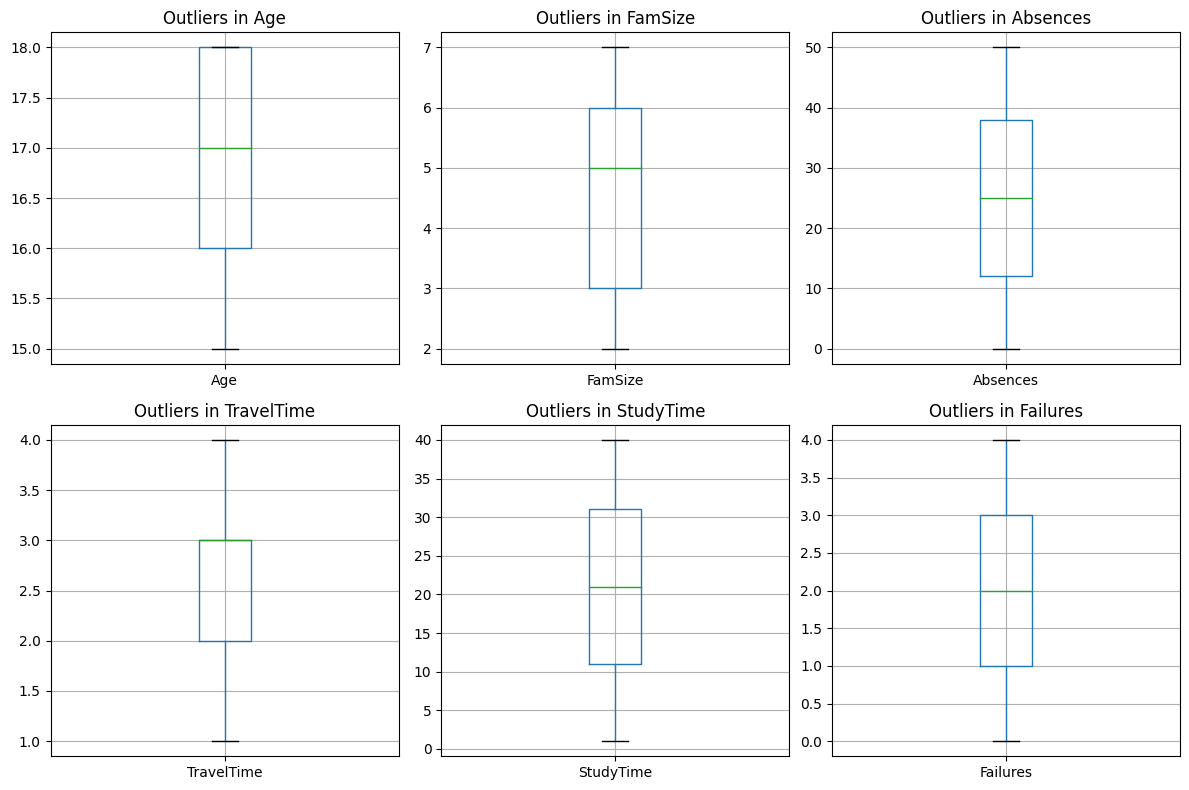

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_dataset.csv')

# Visualization of outliers for numeric features
numeric_features = ['Age', 'FamSize', 'Absences', 'TravelTime', 'StudyTime', 'Failures']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=feature)
    plt.title(f'Outliers in {feature}')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv('student_dataset.csv')

# Print the data types of each column
print(data.dtypes)


ID            object
Name          object
School        object
Sex           object
Age            int64
Address       object
FamSize        int64
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
Reason        object
Guardian      object
Internet      object
Romantic      object
Famrel        object
FreeTime       int64
Goout          int64
Badhabbits    object
Health        object
Absences       int64
TravelTime     int64
StudyTime      int64
Failures       int64
SchoolSup     object
Famsup        object
Activities    object
Higher        object
English        int64
Physics        int64
Chemistry      int64
Biology        int64
Math           int64
Statistics     int64
FinalMarks     int64
FinalGrade    object
dtype: object


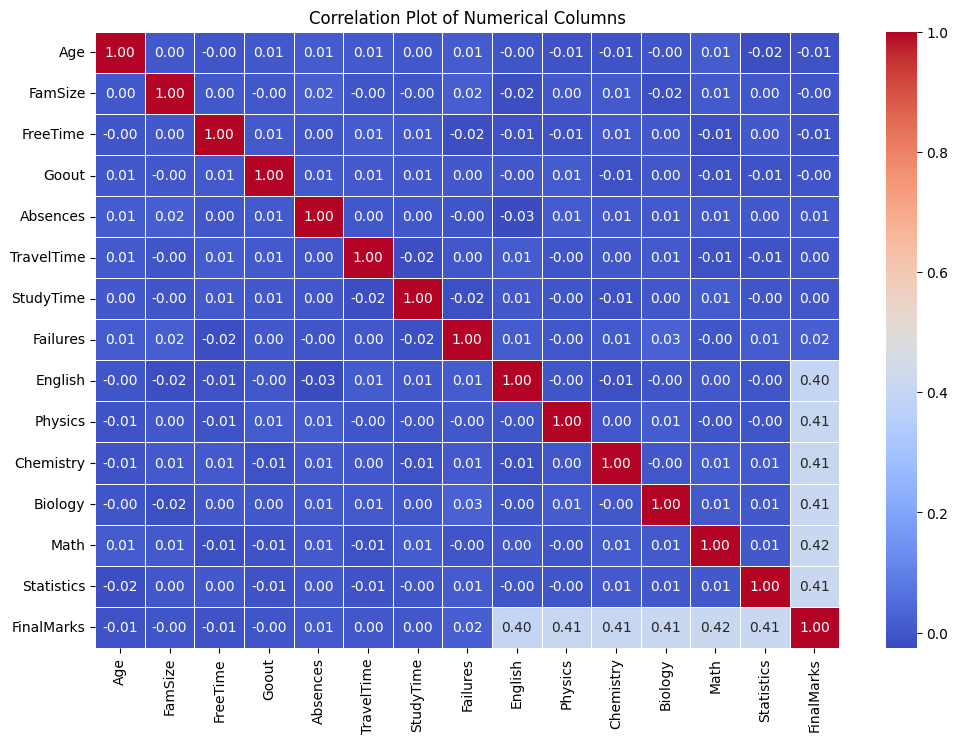

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("student_dataset.csv")

# Select only numerical columns for the correlation plot
numerical_cols = ['Age', 'FamSize', 'FreeTime', 'Goout', 'Absences', 'TravelTime', 'StudyTime', 'Failures',
                  'English', 'Physics', 'Chemistry', 'Biology', 'Math', 'Statistics',
                  'FinalMarks']

# Create a new DataFrame containing only the numerical columns
numerical_data = data[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a correlation plot using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Plot of Numerical Columns")
plt.show()


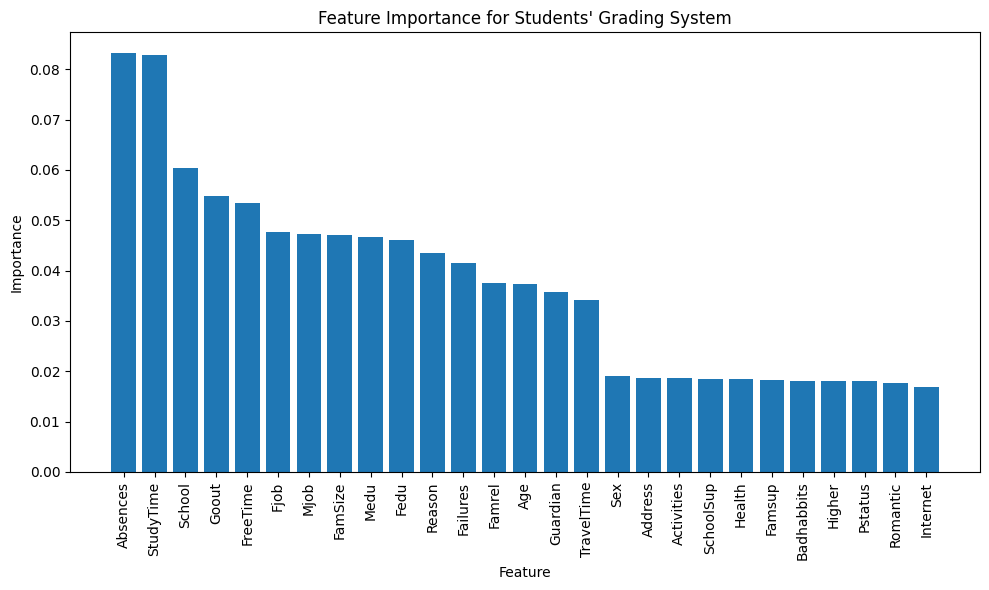

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib. pyplot as plt

# Load the dataset
df = pd.read_csv('student_dataset.csv')

# Encode categorical features
encoder = LabelEncoder()
categorical_features = ['School', 'Sex', 'Address', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'Reason', 'Guardian', 'Internet', 'Romantic', 'Badhabbits', 'Health', 'SchoolSup', 'Famsup', 'Activities', 'Higher', 'FinalGrade', 'Famrel']

# Convert columns to string type before encoding
for feature in categorical_features:
    df[feature] = df[feature].astype(str)
    df[feature] = encoder.fit_transform(df[feature])

# Separate features and target variable
X = df.drop(['ID', 'Name', 'FinalGrade', 'FinalMarks', 'English', 'Physics', 'Chemistry', 'Biology', 'Math', 'Statistics'], axis=1)
y = df['FinalGrade']

# Train a RandomForestClassifier to determine feature importance
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Students\' Grading System')
plt.tight_layout()
plt.show()
